<a href="https://colab.research.google.com/github/yhernandez55/nyc-motor-vehicle-collisions/blob/main/Explorer_TDSP_Yanelly_Hernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 **Welcome to the <font color='crimson'>** **Explorer Transportation Data Science Project! 🚗**</font>
 Hosted by the [Northeast Big Data Innovation Hub](https://nebigdatahub.org/about) & [National Student Data Corps](https://nebigdatahub.org/nsdc), in collaboration with the [U.S. Department of Transportation Federal Highway Administration](https://highways.dot.gov/).


---



Dataset from here: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

## Project Information and Background:

**Project Description:**

By participating in this project, you are joining a
community of transportation data science learners interested in making roads safer for vulnerable road users.

The Explorer TDSP has six Milestones, including guided transportation research into a community of interest. Each Milestone can take 1-5 hours, or less, depending on your level of experience.

To learn more about this project, including key highlights, incentives, and important links, [review the TDSP Webpage here](https://nebigdatahub.org/nsdc/tdsp/)!


---
---

## Milestone #1 - Data Preparation:
GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic exploratory data analysis.
  

In [ ]:
# Import libraries used in Data Analysis and Data visualization:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

These are the libraries that will help us throughout this project.

Here is more information about this project here:  [You may use the Data Science Resource Repository (DSRR) to find resources to get started!](https://nebigdatahub.org/nsdc/data-science-resource-repository/)



Here is the data that I will be using throuughout this project: [NYC OpenData Motor Vehicle Collisions - Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). According to NYC Open Data, "each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC."




In [ ]:
# Read the data using pandas read_csv function
data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20250112.csv")

<ipython-input-3-82e0774ed575>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250112.csv")


**Step 3:** Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataset.

In [ ]:
# Print the first 5 rows of the data using head function of pandas
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Describe the data using the describe function of pandas
desc_stats = data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.908529e+06,1.908529e+06,2.148073e+06,2.148060e+06,2.148091e+06,2.148091e+06,2.148091e+06,2.148091e+06,2.148091e+06,2.148091e+06,2.148091e+06
mean,4.061988e+01,-7.373790e+01,3.196279e-01,1.542322e-03,5.815489e-02,7.630031e-04,2.795878e-02,1.205722e-04,2.292948e-01,6.340514e-04,3.213368e+06
std,2.057953e+00,3.854712e+00,7.081017e-01,4.144610e-02,2.472716e-01,2.817938e-02,1.669899e-01,1.102219e-02,6.692569e-01,2.753927e-02,1.507099e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066755e+01,-7.397469e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.173142e+06
50%,4.072055e+01,-7.392705e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.710312e+06
75%,4.076962e+01,-7.386674e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.247566e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.784868e+06


### Key Insights from Initial Data Exploration  

- **Latitude & Longitude:** Some crashes have latitude/longitude values of `0`, likely due to missing or inaccurate data. This will need to be addressed in data cleaning.  
- **Injuries per Crash:** The average number of injuries per crash is **~0.3**, with a maximum of **43 injuries** in a single incident.  
- **Fatalities per Crash:** Fatal accidents are rare, with an average of **0.00146 deaths per crash** and a maximum of **8 fatalities** in a single event.  
- **Pedestrian, Cyclist, and Motorist Injuries/Fatalities:** These columns break down the impact by affected individuals, which could help in identifying high-risk groups.  
- **Collision ID:** Each crash has a unique identifier, useful for tracking and joining data across sources.  


---

## Milestone #2 - Data Ethics, Pre-Processing, and Exploration:
GOAL: The main goal of this milestone is to assess the dataset, find missing values, and decide what to do with those missing data points.

**Question:** Based on the resources above and outside knowledge, what are some potential bias issues related to the availability of data from well-resourced communities as compared to under-resourced communities? How might bias show up in our dataset?

> Answer: Some potential biases could arise from sampling biases inherent in the data, as well as gaps in missing data, which can lead to bias toward one outcome over another. Missing data and sampling bias can result in the misrepresentation of the data.



In [ ]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = data.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(data)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2138778,99.566452
CONTRIBUTING FACTOR VEHICLE 5,2138482,99.552673
VEHICLE TYPE CODE 4,2114154,98.420132
CONTRIBUTING FACTOR VEHICLE 4,2112892,98.361382
VEHICLE TYPE CODE 3,1999193,93.068357
CONTRIBUTING FACTOR VEHICLE 3,1993364,92.797000
OFF STREET NAME,1779075,82.821212
CROSS STREET NAME,819046,38.129018
ZIP CODE,666095,31.008696
BOROUGH,665832,30.996452


Here's an overview of the missing values in the dataset:

Columns like VEHICLE TYPE CODE 5, CONTRIBUTING FACTOR VEHICLE 5, VEHICLE TYPE CODE 4, and so on have a high percentage of missing values. This is expected since not all crashes involve multiple vehicles or factors.

OFF STREET NAME and CROSS STREET NAME have significant missing values. This could be due to crashes occurring in locations where these details aren't applicable or weren't recorded.

ZIP CODE, BOROUGH, and ON STREET NAME also have missing values. This might be due to incomplete data entry or crashes occurring in areas where these specifics aren't easily determinable.

LOCATION, LATITUDE, and LONGITUDE have the same count of missing values, indicating that when one is missing, the others are likely missing as well.

<ipython-input-50-b9f71f2d6469>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_factors.index, y= top_factors.values, palette="magma")


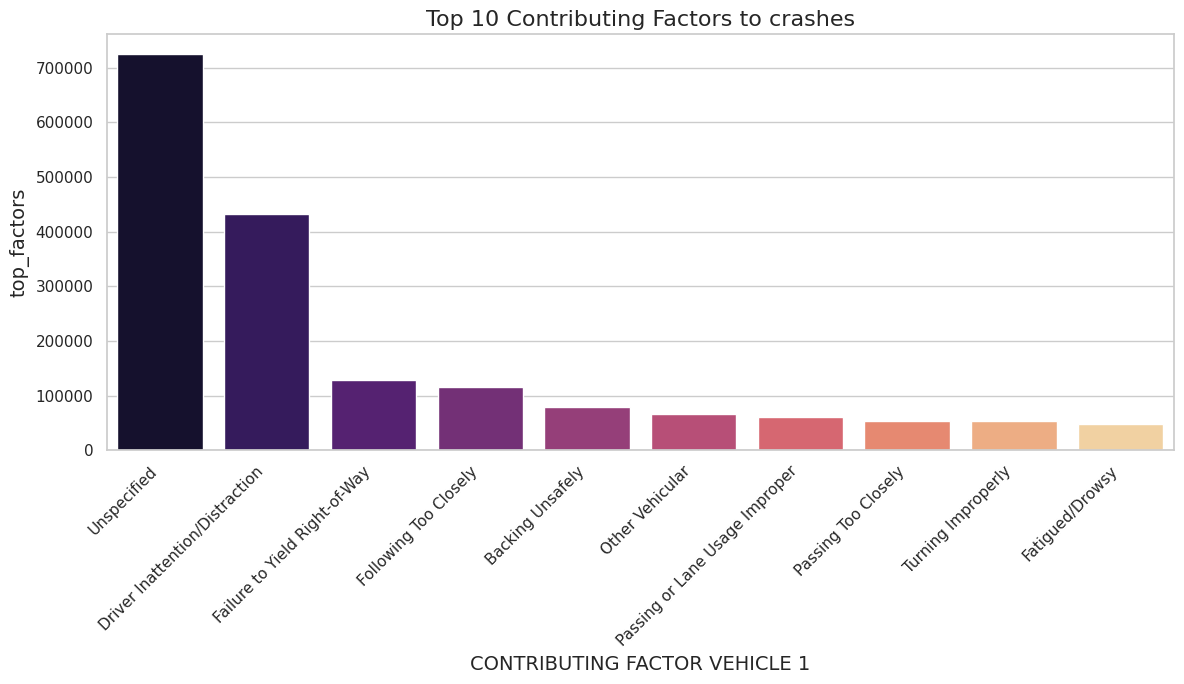

In [ ]:
"""Create a bar chart to display the top 10 contributing factors
(e.g. backing up unsafely, unsafe lane changing, etc.)
to crashes within the dataset."""

# Plot a Bar Chart
top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
# Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(x= top_factors.index, y= top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('CONTRIBUTING FACTOR VEHICLE 1', fontsize=14)
plt.ylabel('top_factors', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# what are the top 3 contributing factors that cause the most crashes?
# Using .value_counts to look.
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

,count
CONTRIBUTING FACTOR VEHICLE 1,
Unspecified,724900
Driver Inattention/Distraction,433036
Failure to Yield Right-of-Way,128168
Following Too Closely,115214
Backing Unsafely,78877
...,...
Windshield Inadequate,85
Cell Phone (hand-held),79
Texting,53


**Question:** Besides for "Unspecified," what are the top 3 contributing factors that cause the most crashes?

> *  Driver Inattention/Distraction
> *  Failure to Yield Right-of-Way
> *  Following Too Closely

**Question:** What recommendations would you make to new and current drivers after assessing the above data?

> *  Based on the top three factors, I would focus on recommending ways to avoid distractions while driving and promote it with statistics explaining why there should be no distractions.



<ipython-input-52-3f0066c7e47f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


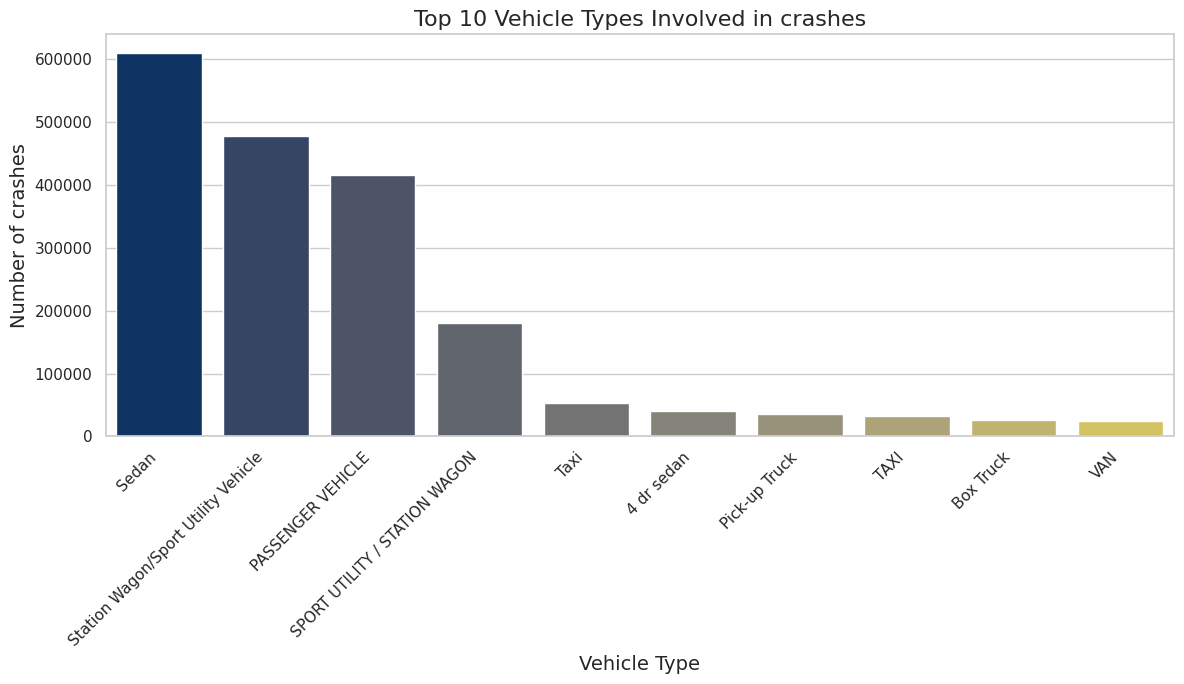

In [ ]:
"""creating another bar chart to determine which vehicle types
were involved in the most crashes."""

# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x= top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Question:** What are the top 3 vehicles that were most involved in crashes?


> *   Sedans
> *   Station Wagons
> *   Passenger Vehicles







In [ ]:
# top 3 vehicles that were involved in crashes:
data['VEHICLE TYPE CODE 1'].value_counts()

,count
VEHICLE TYPE CODE 1,
Sedan,609095
Station Wagon/Sport Utility Vehicle,478405
PASSENGER VEHICLE,416206
SPORT UTILITY / STATION WAGON,180291
Taxi,53670
...,...
NYCHA,1
Snow,1
COMER,1


**Question:** Why do you think that "Sedan[s]," "Station Wagon[s]," and "Passenger Vehicle[s]" are involved in a larger number of crashes, injuries, and deaths when compared to the rest of the vehicles? (Think outside the box!)


> *  "Well, we can assume that station wagons may be involved due to the inability to check their blind spot, while passenger vehicles could be affected by the amount of distractions indicated by this dataset. We can probably predict or correlate how the outcome of VEHICLE TYPE CODE 1 relates to the outcome of CONTRIBUTING FACTOR VEHICLE 1.




**Question:** Review the x-axis of the bar chart you created above. </br>
1) What do you notice? </br>
2) What would you recommend we do to improve the bar chart, based on the x-axis (horizontal axis) and why? </br>
3) What recommendation would you make to those who are collecting and/or inputting data into this dataset?


> *  1) Based on the bar chart, I can visually tell that sedans are among the cars that often have more car crashes compared to taxis or vans.
> *  2) I would definitely add numbers to the bar chart next to the values on the y-axis so that we can see the exact number for each car.
> *  3) A recommendation would be to consider using a different shade when differentiating each type of vehicle.





<ipython-input-54-1d14d8e1a468>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


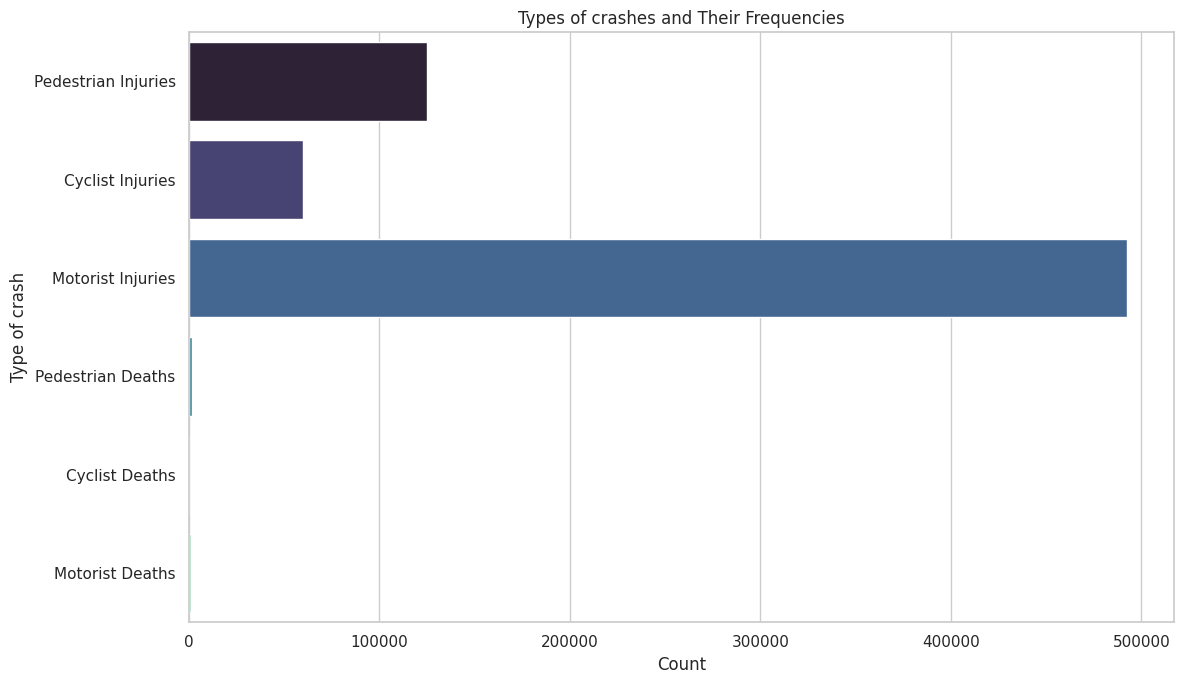

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


**Question:** Analyze the chart above. What is a recommendation you might make to the Department of Transportation based on this data?


> *  Based on the visualization, we can say that there are more motorist injuries compared to the rest of the injuries as well as deaths. I would recommend the Department of Transportation consider analyzing further how these motorist injuries occur to help raise awareness about this issue.

---

## Milestone #3 - Time Series Analysis
GOAL: The main goal of this milestone is to dive deeper into Time Series Analysis in order to better understand our data's trends over time.

**Question:** What are the key components of Time Series Analysis and how do they apply to this dataset?
> *  TSA (Time Series Analysis) identifies three types of patterns: trend, seasonal, and cyclic. Seasonal patterns depend on the time of year, while cyclic patterns have fluctuating frequencies that are not tied to specific seasons. For example, ice cream sales typically follow seasonal trends, with higher sales in the summer than in the winter. Time plots are a useful tool for analyzing TSA, as they help visualize whether the data represents a trend, seasonal variation, or cyclic behavior.

<ipython-input-55-b05870b9677e>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


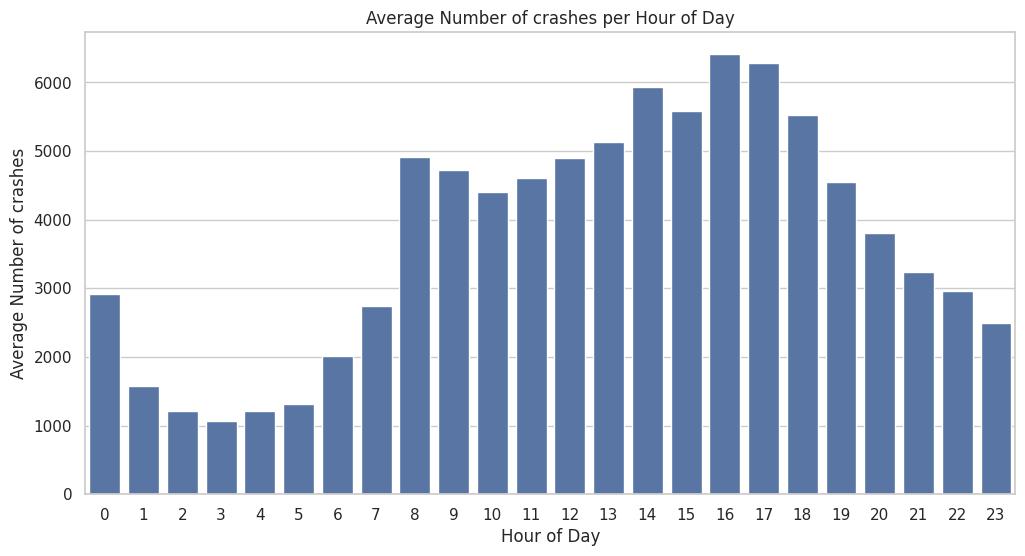

In [ ]:
"""creating a chart that displays the average number of
crashes per hour of the day. This helps us understand whether additional
factors are contributing to crashes - i.e. rush hour, school dismissal
time, night fall, etc."""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "Motor_Vehicle_Collisions_-_Crashes_20250112.csv"
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()


**Question:** Which time of the day sees the most crashes? Why do you think so?

> *  Based on the graph, the time of day with the most crashes seems to be hour 16. However, if we consider ranges, I would say that the hours between 14:00 and 18:00 have the most crashes. We can assume that this is the peak time for traffic and when people are returning home from work. People may be tired, which could lead to decreased awareness of their surroundings.

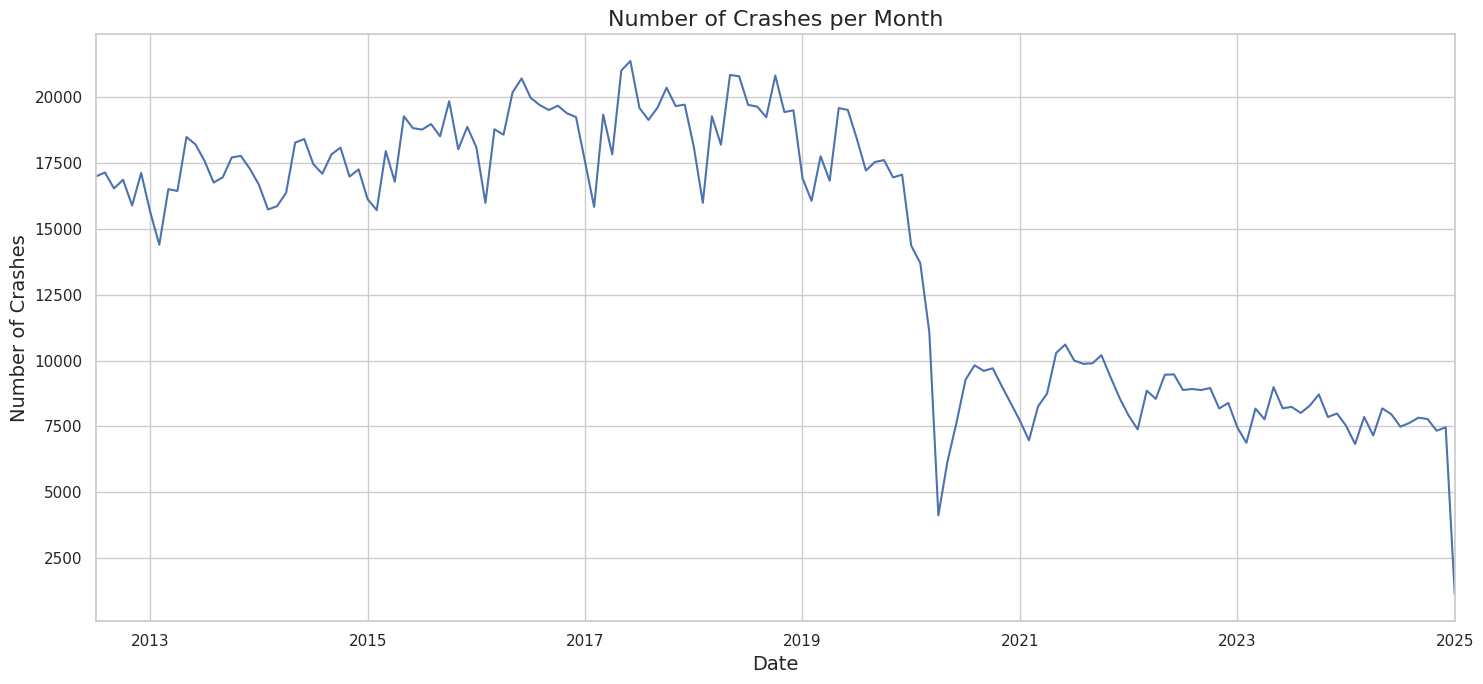

In [ ]:
"""Plot a graph to determine how COVID-19 impacted the number of
crashes per month, if at all.
"""

# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

**Question:** What does your graph tell you about the impact of COVID-19 on the number of crashes per month? Why do you think this occurred?

> *  We can see that before COVID-19, there were more crashes than after, as shown by the sudden drop. This occurred because more people were working from home instead of going in person, and they were also limiting their outings due to the pandemic.

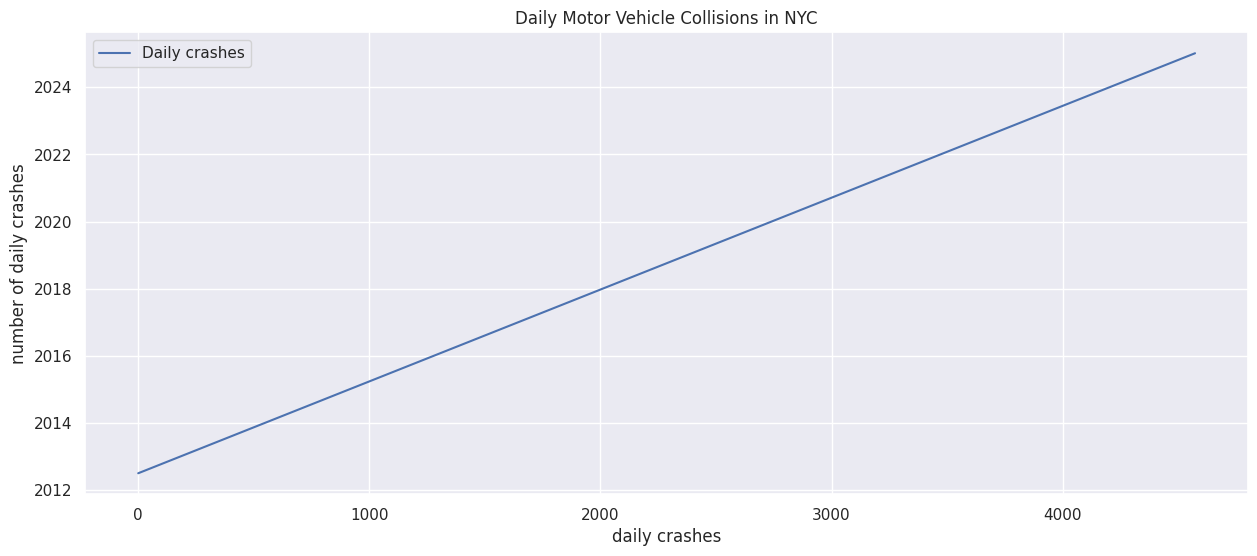

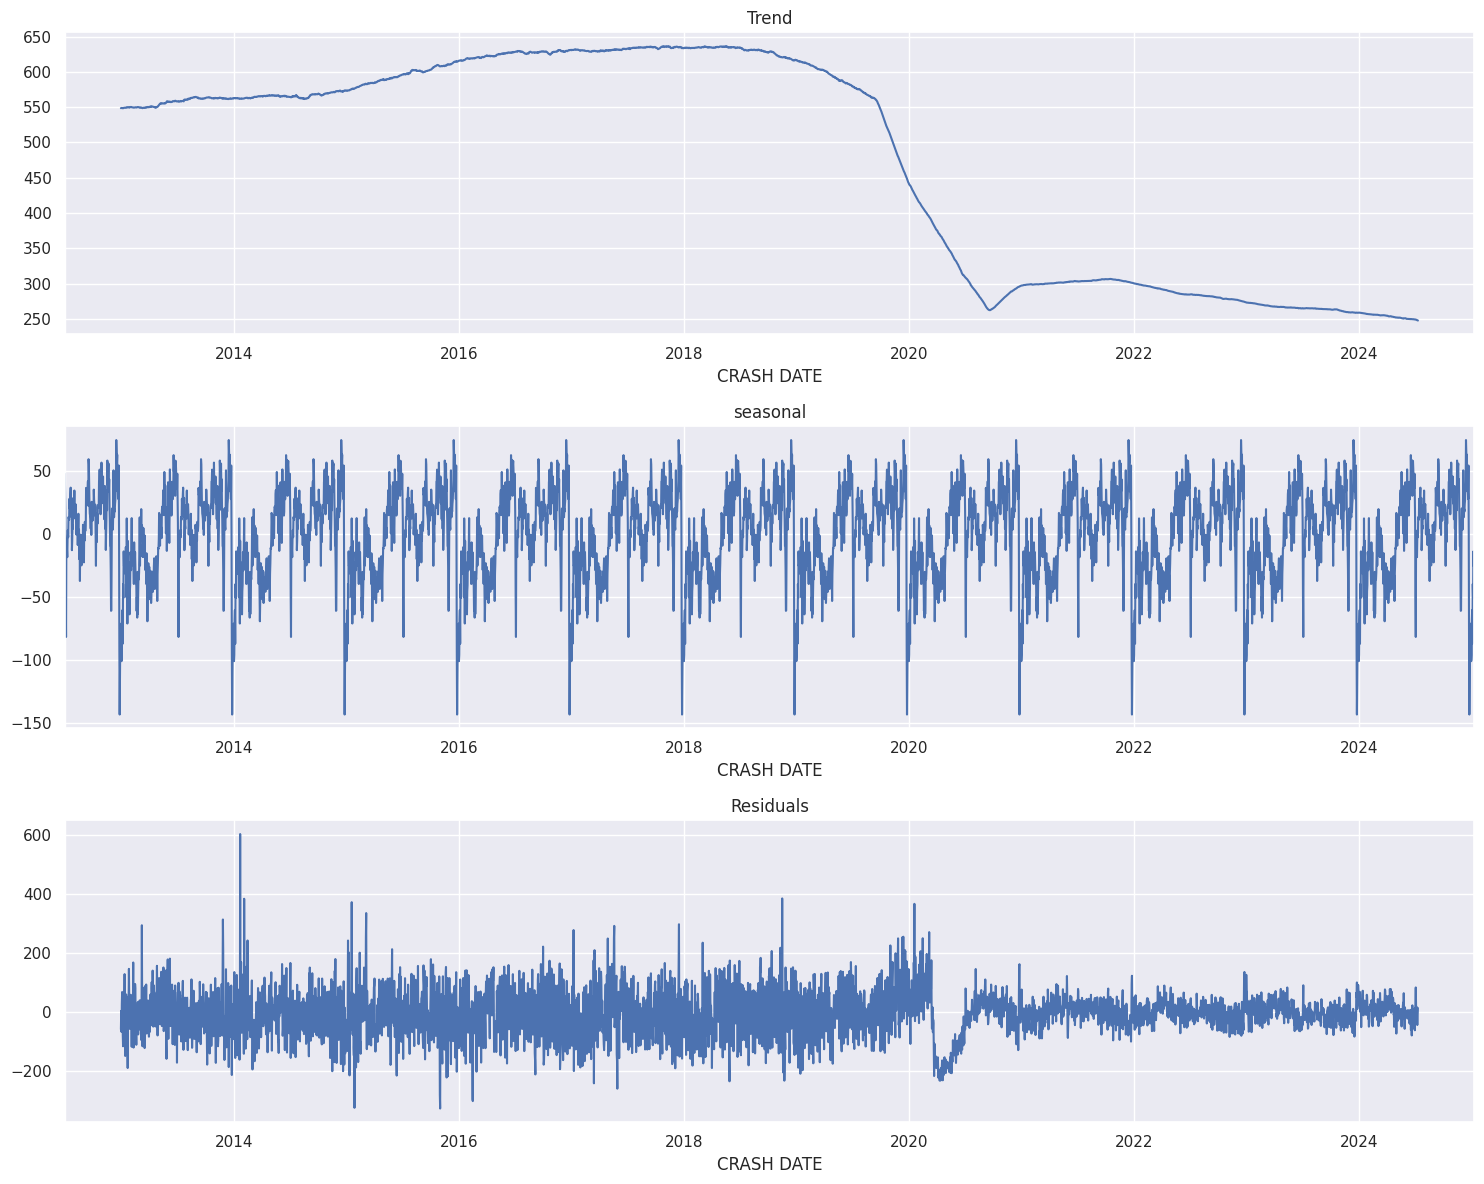

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby('CRASH DATE').size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes.index, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('daily crashes')
plt.ylabel('number of daily crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('seasonal')
decomposition.resid.plot(ax = ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

The visualizations above provide valuable insights into the time series of daily motor vehicle collisions in New York City:

1. Time Series Plot: This shows the number of daily crashes over time. You might observe long-term trends, seasonal patterns, or significant outliers.

2. Decomposed Components:
  
    2.1 Trend: This graph shows the long-term trend in the data, which can indicate whether crashes are increasing, decreasing, or stable over time.

    2.2 Seasonality: This reveals any regular patterns that repeat over a specific period, such as yearly. It helps identify times of the year with higher or lower crash frequencies.

    2.3 Residuals: These are the irregular components that cannot be attributed to the trend or seasonality. They might include random or unpredictable fluctuations.

**Question:** Based on your *trend graph*, are we seeing an increase or a decrease in crashes between 2014 and 2022?

> *  The trend seems to be steady between the years 2014 to 2018 and tends to decrease spontaniously after 2019 with a slight increase after approximately 2021.


**Question:** Based on your *residual graph*, in what year(s) was there a significant unpredicted fluctuation? Why do you think so?

> *  There was significant fluctions mainly in the year 2014 and 2020. As for 2014 I am not quite sure as to why but as for 2020 we can assume that because of covid-19 there seems to be less car crashes hence the fluctiation.

---

## Milestone #4 - Geospatial Analysis:
GOAL: The main goal of this milestone is to explore geospatial aspects of the dataset and get comfortable with regional analysis and geospatial visualizations.

<ipython-input-59-4f14068022f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


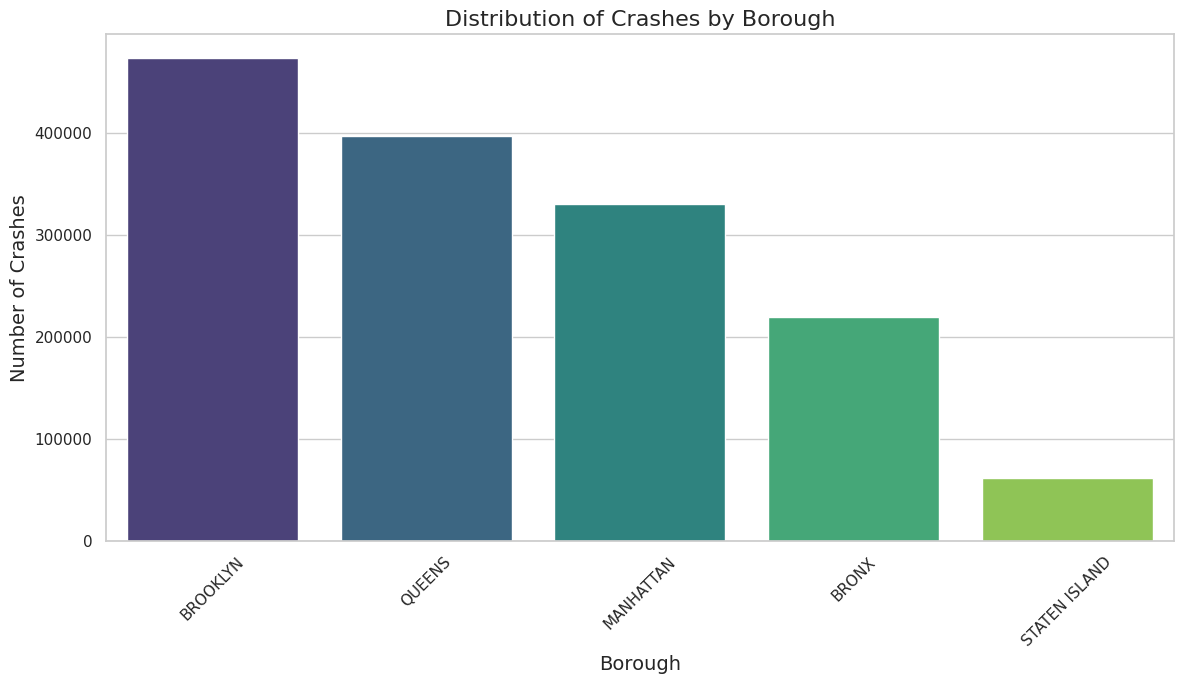

In [ ]:
# Plot a bar chart to compare the number of crashes that occurred in each of the five boroughs.
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Question:** Which borough has the highest number of crashes? Which borough has the lowest?

> * Highest: Brooklyn
> * Lowest: Staten Island


**Question:** Are there any reasons that you think a certain borough has a higher or lower number of crashes? What are some factors that may be causing this?

> *  We can assume that based on population density we can say that there are more crashes in Brooklyn compared to Staten Island. This can be due to the increase in traffic and extensive road work that happens in brooklyn.

Heatmaps are graphical representations that use color coding to represent different values and variables. Let's leverage a heatmap to determine the most dangerous intersections in the dataset. (**Note: the below cell may take a few minutes to run**)

In [ ]:
# Create a heatmap leveraging the latitude and longitude variables to determine where the most crashes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


**Question:** On the left side of your screen, you will see an icon that represents a folder or a file. Click on that icon to find the file titled "Heatmap.html". Click on the three dots next to your file and download your heatmap! Open the file once downloaded to see your creation.

When looking at your heatmap, where do you see a concentration of crashes?

> *  Based on the heatmap we can see that there are more car crashes near Middle Town and near Manhattan bridge.



Next, we will begin "Severity Mapping." We'll plot crashes on the map and code them based on severity, distinguishing between crashes that resulted in injuries and those that led to fatalities. This will give us a visual representation of where severe crashes tend to occur. </br>

In [ ]:
# : Continue building your heatmap
# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "blue"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "orange"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "green"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


m_severity.save("severity.html") # saving this map as an html file to answer the question below


**Question:** Which intersection(s) seem to be the most dangerous?

> *  The most dangerous intersection seem to be Fulton Street with BedFord Avenue due to the the number of persons killed.



---
---

## Milestone #5 - Self-Guided Research Question:
GOAL: In this Milestone, you will be prompted to take what you’ve learned throughout this project, build your own research question, and create a visualization(s) or model(s) to support your research goals.


You may create your visualization(s) in this Notebook, or in Excel, Tableau, PowerBI, etc. Choose whichever medium you are most comfortable with! Be creative!

For participants who are comfortable with advanced data science techniques, we welcome you to leverage additional datasets, if desired. We highly recommend using pre-cleaned datasets from open data sources, like Kaggle.com.

If you have any questions or get stuck, please email nsdc@nebigdatahub.org with your queries. We're here to help!

**Step 1:** Review the dataset(s) that you will be using. As you explore, [consider the research question you want to answer](https://libraries.indiana.edu/sites/default/files/Develop_a_Research_Question.pdf)! Additionally, think about [who you are telling your data's story to](https://hbr.org/2013/04/how-to-tell-a-story-with-data). Your final audience may contain a group of transportation professionals, data scientists, peers, and the general public. Think about how would you frame your analysis differently for each of these groups.

**Question:** List one or more research questions here that you are considering.

> *  Is there a statistically significant relationship between the time of day and the types of vehicles involved in crashes?
> * Can we identify specific geographic "hotspots" for severe crashes (injuries or fatalities) beyond simple intersection density, considering contributing factors?


**Step 2:** Now, think about what type of analysis you'd like to complete. Are you interested in looking at time series forecasting? Do you have additional maps in mind that you'd like to create? Is there a certain zip code or region you'd like to dive deeper into?

If you happen to be stuck, here are some examples that you can use or can guide you in choosing your research question!

**Examples:**
- How many crashes, injuries, and/or fatalies occurred in a zip code of interest?
- Which zip code sees the highest amount of crashes and what recommendations can you offer to help that community? Is it an underserved community?
- Do more crashes occur in underrepresented communities? Support your conclusion.
- Which day of the week sees the most crashes, injuries, and/or fatalities? (Hint: use the same method we used when we were analyzing the average number of crashes at different times of the day!)
- Does the geometric features of an intersection (90 degree intersection vs skewed intersection) affect the number of crashes that occur?

Be creative and think outside the box!



**Step 3:** Now that you've decided on your transportation research question, [explore the various types of visualizations you can create to support your research](https://datavizcatalogue.com/). You may create visualizations in this Google Colab notebook, Excel, R, SQL, PowerBI, Tableau, etc. Choose a program you are comfortable with!

You may also choose to build a model or leverage a different data science technique based on your experience level.










**Step 4:** Consider the **accessibility** of the graphs, charts, maps, or models you are interested in building. Use the tools below to learn more!
* How does your visualization appear to people [who may not be able to distinguish between muted colors or see your chart at all?](https://chartability.fizz.studio/)
*[Color Contrast Checker](https://policyviz.com/2022/11/01/color-contrast-checker-in-excel/)
*[SAS Graphics Accelerator](https://support.sas.com/software/products/graphics-accelerator/index.html)
*[TwoTone Data Sonification Tool](https://twotone.io/about/)
*[Making Visual Studio Accessible](https://code.visualstudio.com/docs/editor/accessibility)

To make visualizations more inclusive for people with color blindness, you can choose a color palette that is colorblind-friendly. `Seaborn`, a Python visualization library, provides several palettes that are designed to be perceptible by those with color vision deficiencies. Seaborn's `cubehelix` palette is a good choice, as it was designed specifically with color blindness in mind.

**Step 5:** Begin your research! Give yourself plenty of time to build your visualization or model. If you have any questions along the way, please email nsdc@nebigdatahub.org or write a message in the #[tdsp-community Slack Channel](https://join.slack.com/t/nsdcorps/shared_invite/zt-1h64t1e2p-La0AgU_HhymWUEGFQEcb3w).

**Question:** List the research question(s) you've chosen and why! Maybe you chose this question because it can help a community of interest or because it is similar to research you've completed in a class setting. Share your thoughts below.

> *  Is there a statistically significant relationship between the time of day and the types of vehicles involved in crashes?
> *  Do the relative proportions of crashes resulting in injuries or fatalities vary significantly across the five boroughs based on the time of day?

**Question:** Build a visualization, model, or use other statistical methods to gain insights into your data and to support your research question. Build a visualization, model, or use other statistical methods to gain insights into your data and to support your research question.

In [ ]:
# Begin creating here!

In [ ]:
"""What day was of the week was where the most crashes happen?"""

'What day was of the week was where the most crashes happen?'

<ipython-input-64-941780f10d4e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crash_counts.index, y=crash_counts.values, palette='viridis')


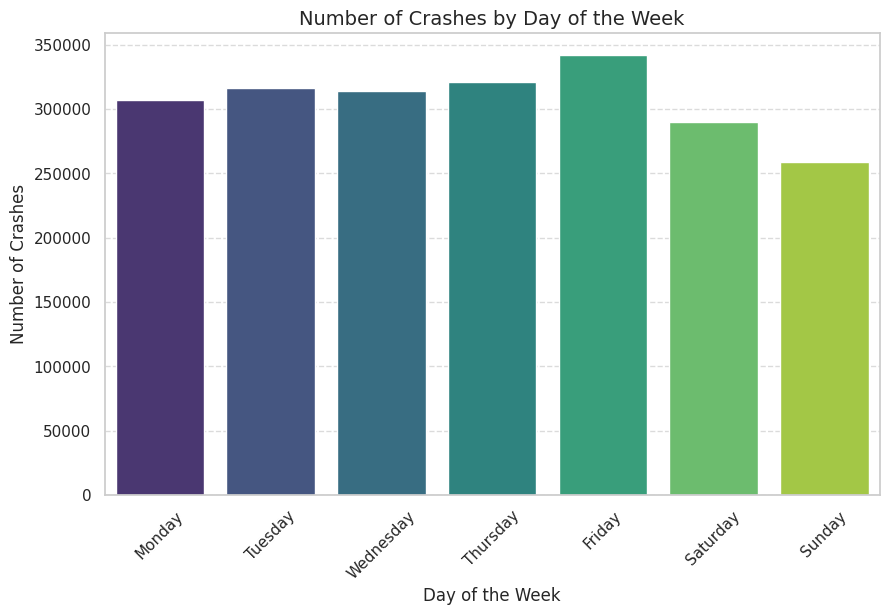

In [ ]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
# Extract day of the week from 'CRASH DATE' and create 'Day_of_Week' column
data['Day_of_Week'] = data['CRASH DATE'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Now you can create the categorical column
data['Day_of_Week'] = pd.Categorical(data['Day_of_Week'], categories=day_order, ordered=True)

# checking which day of week has the most crashes:
crash_counts = data['Day_of_Week'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=crash_counts.index, y=crash_counts.values, palette='viridis')
plt.title('Number of Crashes by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the first question, we can use it to answer the following questions mentioned below. To address these questions, I will focus more in-depth on Friday, as there are more car crashes reported on that day.

In [ ]:
"""Is there a statistically significant relationship between the time of
day and the types of vehicles involved in crashes?"""

'Is there a statistically significant relationship between the time of\nday and the types of vehicles involved in crashes?'

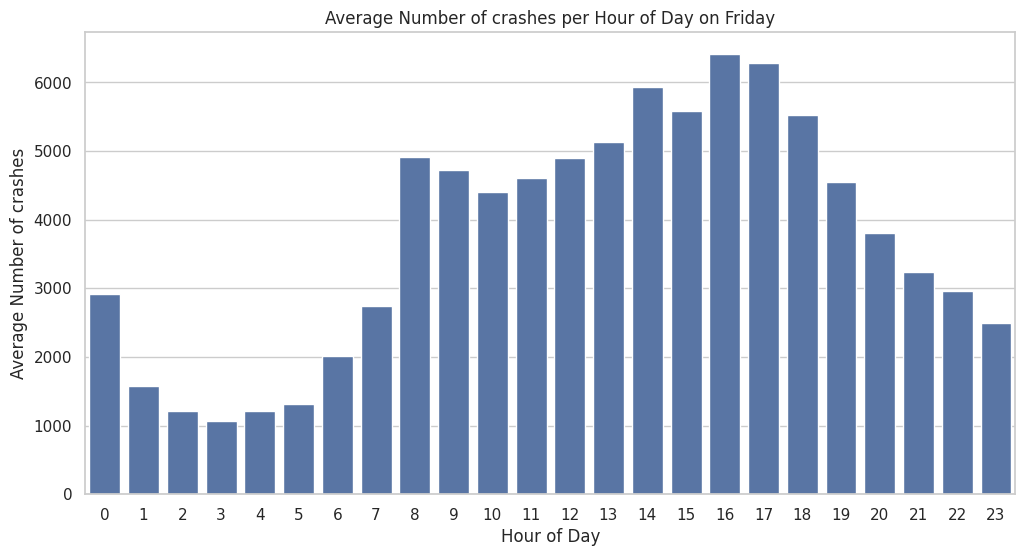

In [ ]:
# Finding the crash times done on Friday
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')
data['Hour of Day'] = data['CRASH TIME'].dt.hour
average_crashes_per_hour_friday = data[data['Day_of_Week']== 'Friday'].groupby('Hour of Day').size()/data['Hour of Day'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of crashes per Hour of Day on Friday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()

---

This graph first shows the average number of car crashes that occurred on Friday. Next, I will analyze how this relates to the types of vehicles.

In [ ]:
# categorizing the vehicle types:
data['Vehicle_Type'] = data['VEHICLE TYPE CODE 1'].astype(str).str.lower()
vehicle_counts  = data['Vehicle_Type'].value_counts()
threshold = 10000
rare_types = vehicle_counts[vehicle_counts < threshold].index
data.loc[data['Vehicle_Type'].isin(rare_types), 'Vehicle_Type'] = 'Other'
# Create a contingency table to look at the statistical relationships:
contingency_table = pd.crosstab(data['Hour of Day'], data['Vehicle_Type'])

# Statistical test (Chi-squared test)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the p-value:
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant relationship between the time of day and the types of vehicles involved in crashes.")
else:
    print("There is no statistically significant relationship between the time of day and the types of vehicles involved in crashes.")


Chi-squared statistic: 55011.915760282835
P-value: 0.0
There is a statistically significant relationship between the time of day and the types of vehicles involved in crashes.


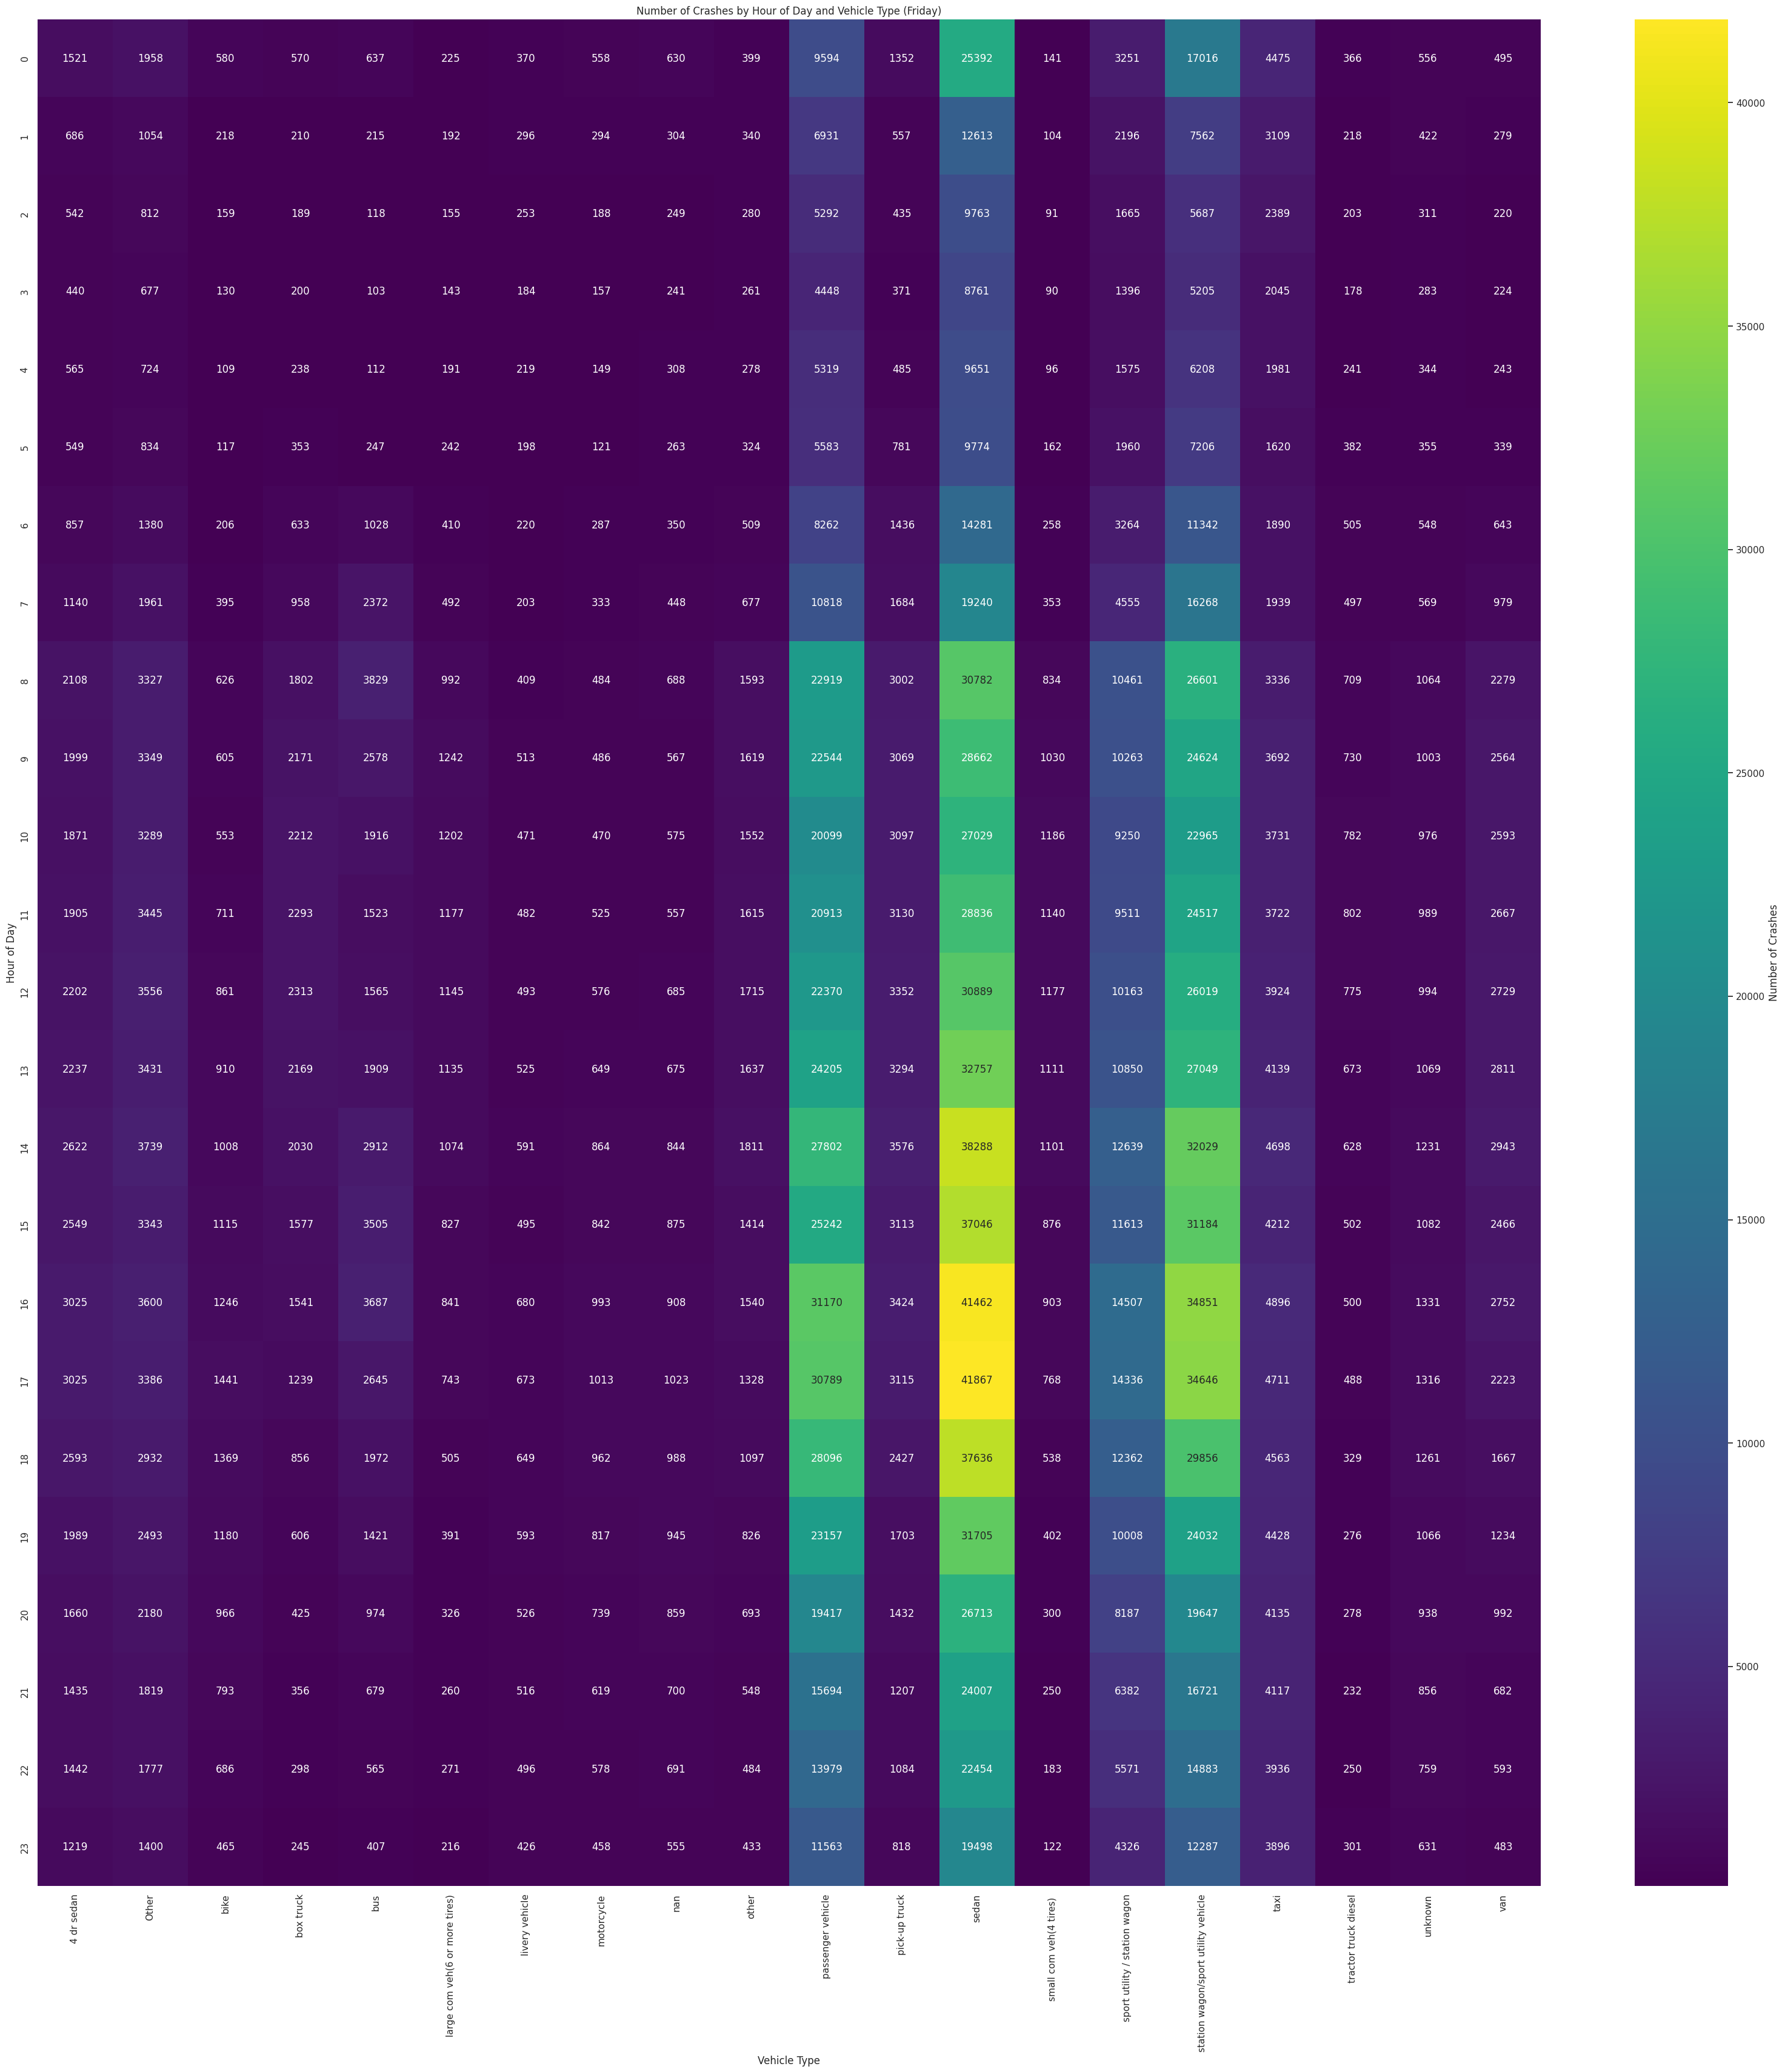

In [ ]:
# Heatmap of different vehicles:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="viridis", cbar=True,
            cbar_kws={'label': 'Number of Crashes', 'orientation': 'vertical'}) # Added orientation for left placement
plt.title("Number of Crashes by Hour of Day and Vehicle Type (Friday)")
plt.xlabel("Vehicle Type")
plt.ylabel("Hour of Day")
plt.show()

This analysis focuses on the crashes that occurred on Fridays, as that day had the highest number of crashes. Next, we will visualize the severity levels of these crashes to see how they relate to the types of vehicles involved. For this step, I will analyze the top 10 vehicles involved in car crashes instead of examining all vehicles.

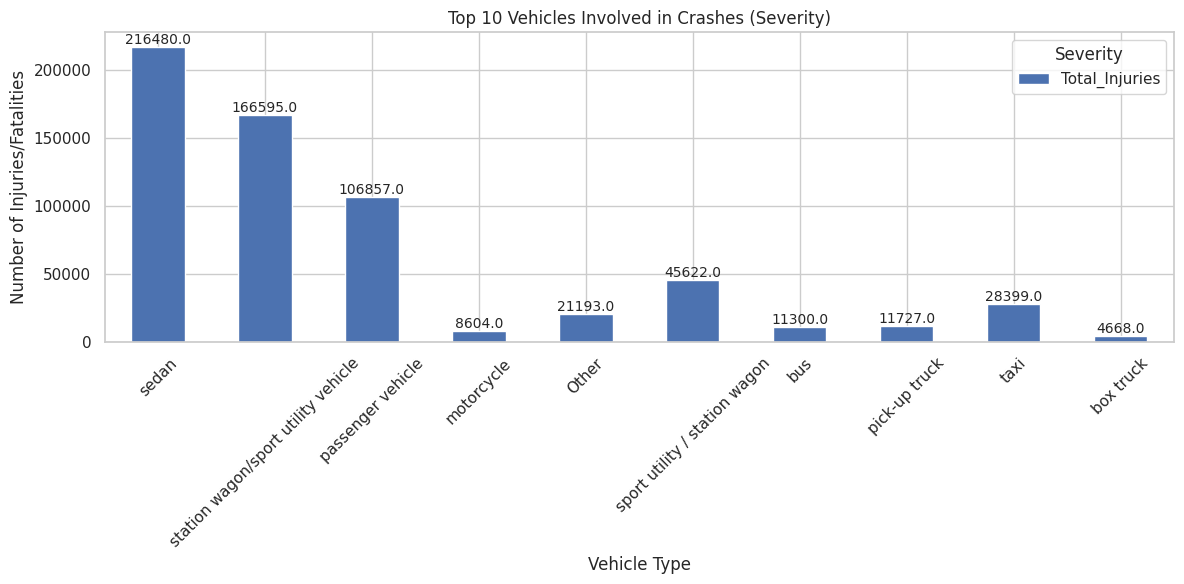

In [ ]:
""" *severity* of crashes at in terms of vehicles. """

# Group by vehicle type and calculate the sum of 'NUMBER OF PERSONS INJURED' and 'NUMBER OF PERSONS KILLED'
vehicle_severity = data.groupby('Vehicle_Type').agg(
    Total_Injuries=('NUMBER OF PERSONS INJURED', 'sum'),
    Total_Fatalities=('NUMBER OF PERSONS KILLED', 'sum')
).sort_values(by=['Total_Fatalities', 'Total_Injuries'], ascending=False)

# Select the top 10 vehicle types by severity
top_10_vehicles = vehicle_severity.head(10)
top_10_vehicles


# Plotting for visualization (Previous Cell's Code)
plt.figure(figsize=(12, 6))
top_10_vehicles['Total_Injuries'].plot(kind='bar', stacked=True)
plt.title('Top 10 Vehicles Involved in Crashes (Severity)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Injuries/Fatalities')
plt.xticks(rotation=45)
plt.legend(title='Severity')

# adding the number to each bar:
for index, value in enumerate(top_10_vehicles['Total_Injuries']):
  plt.text(index, value, str(value), ha = 'center', va = 'bottom', fontsize=10)
plt.tight_layout()
plt.show()

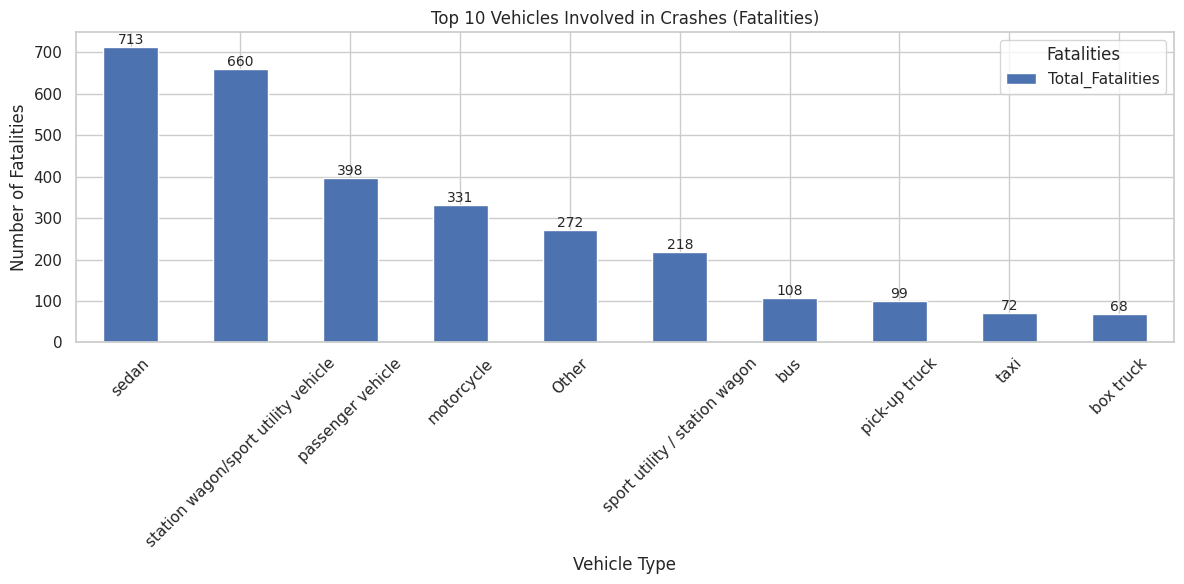

In [ ]:
# Plotting for visualization of Total Fatalities
plt.figure(figsize=(12, 6))
top_10_vehicles['Total_Fatalities'].plot(kind='bar', stacked=True)
plt.title('Top 10 Vehicles Involved in Crashes (Fatalities)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.legend(title='Fatalities')

# Adding the number to each bar
for index, value in enumerate(top_10_vehicles['Total_Fatalities']):
    plt.text(index, value, str(int(value)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Based on these two graphs, we can observe the severity of each car crash. In both graphs, sedans have the highest severity levels for both Total_Injuries and Total_Fatalities.

In [ ]:
""" Do the relative proportions of crashes resulting in injuries or fatalities vary significantly across the
five boroughs depending on the time of day?"""

' Do the relative proportions of crashes resulting in injuries or fatalities vary significantly across the\nfive boroughs depending on the time of day?'

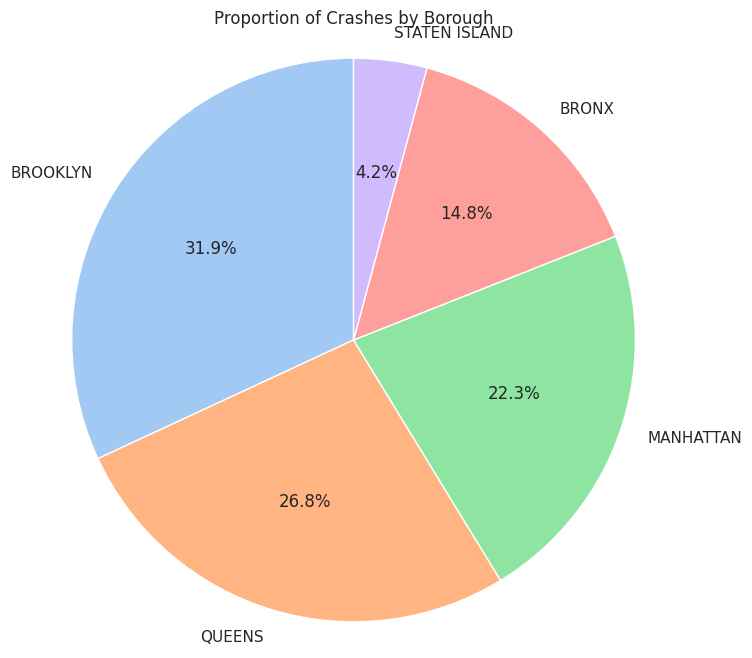

In [ ]:
# Plotting a pie chart to show the proportion of crashes in each borough
plt.figure(figsize=(8, 8))
borough_counts = data['BOROUGH'].value_counts()
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Proportion of Crashes by Borough')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Based on this pie chart, we can see that Brooklyn has the highest proportion of crashes compared to the other boroughs, with a leading 5.1% difference over the second-highest percentage, which is Queens.

In [ ]:
# Create a contingency table for boroughs and time of day
data['Hour of Day'] = pd.to_datetime(data['CRASH TIME']).dt.hour  # Extract hour
contingency_borough_time = pd.crosstab(data['BOROUGH'], data['Hour of Day'])

# Statistical test (Chi-squared test)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_borough_time)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the p-value:
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant relationship between the time of day and the location of the crashes.")
else:
    print("There is no statistically significant relationship between the time of day and the the location of crashes.")


Chi-squared statistic: 5140.093750209084
P-value: 0.0
There is a statistically significant relationship between the time of day and the types of vehicles involved in crashes.


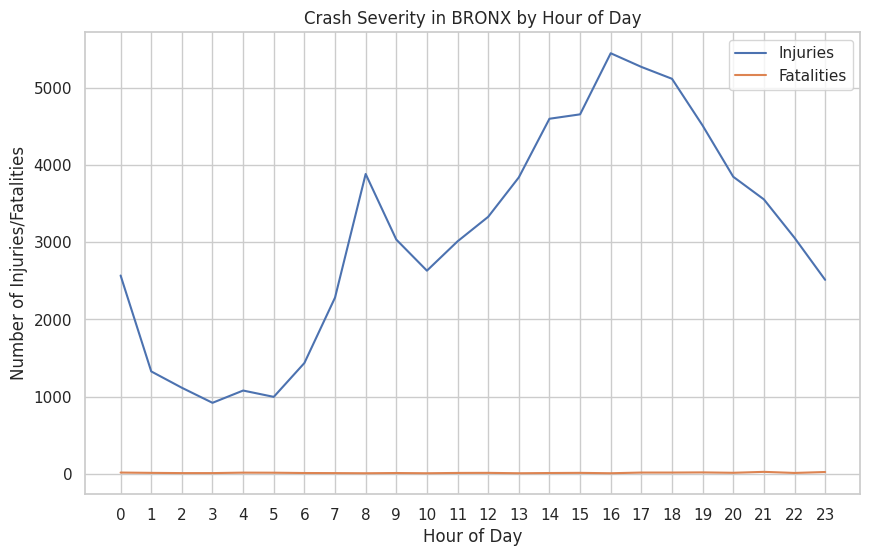

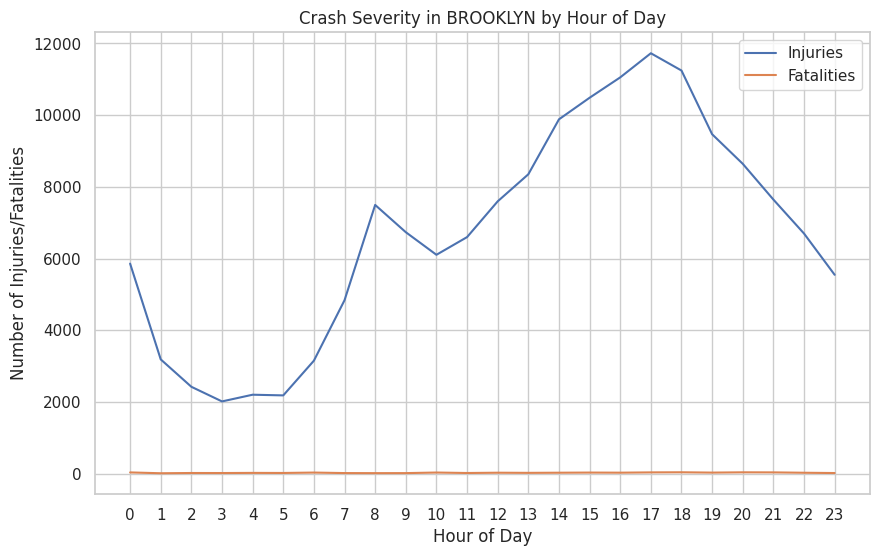

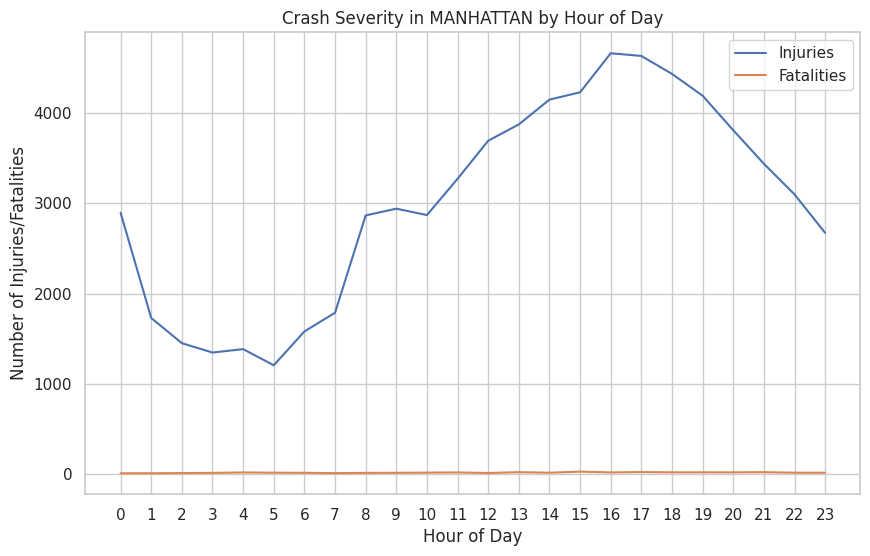

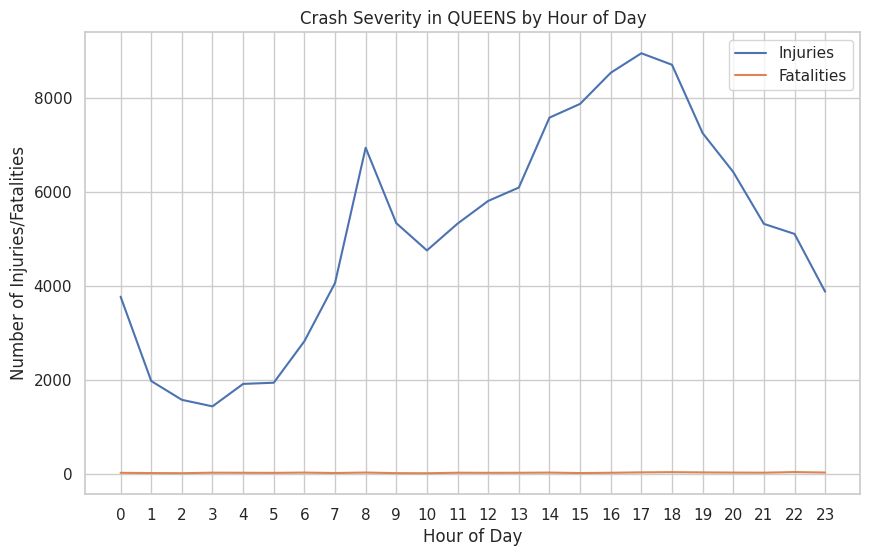

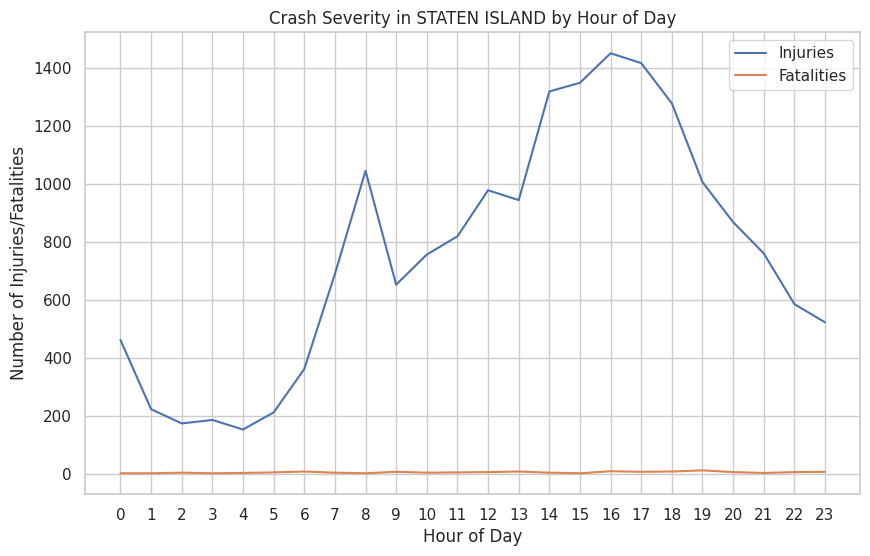

In [ ]:
# Group data by borough and hour, then sum injuries and fatalities
borough_hour_severity = data.groupby(['BOROUGH', 'Hour of Day']).agg(
    Total_Injuries=('NUMBER OF PERSONS INJURED', 'sum'),
    Total_Fatalities=('NUMBER OF PERSONS KILLED', 'sum')
).reset_index()


# Function to plot severity for each borough
def plot_borough_severity(borough):
    borough_data = borough_hour_severity[borough_hour_severity['BOROUGH'] == borough]
    plt.figure(figsize=(10, 6))
    plt.plot(borough_data['Hour of Day'], borough_data['Total_Injuries'], label='Injuries')
    plt.plot(borough_data['Hour of Day'], borough_data['Total_Fatalities'], label='Fatalities')
    plt.title(f'Crash Severity in {borough} by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Injuries/Fatalities')
    plt.legend()
    plt.xticks(range(0, 24))
    plt.show()


# Plot for each borough
for borough in borough_hour_severity['BOROUGH'].unique():
    plot_borough_severity(borough)

Conclusion:
So far, we have examined these two central questions:

1. Is there a statistically significant relationship between the time of day and the types of vehicles involved in crashes?
2. Do the relative proportions of crashes resulting in injuries or fatalities vary significantly across the five boroughs depending on the time of day?

1.
Based on the statistics from the contingency table, we can conclude that there is a significant relationship between the time of day and the types of vehicles involved in crashes. By analyzing the top 10 vehicles involved in crashes, we may be able to predict when a crash is more likely to occur based on the collected data. Observing specific times, we find that most car crashes occur on Fridays, particularly in the afternoon when people are tired from work. This insight can help identify potential resolutions to prevent such crashes.

2.
Additionally, we observe that Brooklyn appears to be a hotspot for car crashes, as noted earlier. The data from the contingency table analyzing boroughs and times confirms a significant relationship between the time of day and the locations of these crashes. Furthermore, the analysis highlights differences across the five boroughs of New York, showing how crash severity varies depending on the hour of the day (e.g., Fridays) and the specific locations.

Further Consideration:
An additional question to investigate could be: Could weather conditions influence why or when more crashes occur, beyond the factors already analyzed?




Something that I could have further investigated or asked myself could have been: Could wheather determine why or when there are more crashes, instead of what is listed?

## Milestone #6 - Virtual Poster Board Creation: Data Storytelling

GOAL: The main goal of this milestone is to create a one page, virtual poster board to portray your research findings and recommendations! Your poster may be shared with the Department of Transportation and Federal Highway Authority.

Within your poster, summarize your research question, your reasoning for selecting your data visualization or model choices, and key insights from your data analysis. You may also wish to include your outstanding research questions that could not be answered by the dataset and why.

**Be sure to answer the following on your virtual poster board:** Based on your research insights, what recommendations would you share with the Department of Transportation and Federal Highway Authority to make roads safer for vulnerable road users? Why?

**Additionally, be sure to cite all relevant sources that you referred to throughout this project on your poster board (MLA or APA citation preferred). List acknowlegdments if you received any support from mentors, professors, professionals, etc. throughout your journey.**




 Please use the following resources to get started!


*   [Virtual Poster Board Template](https://nebigdatahub.org/wp-content/uploads/2024/01/Copy-of-dsi-poster.ppt-48-×-36-in.pdf) - Your one-page, virtual poster may be created in PowerPoint, Google Slides, Canva, etc. Choose what you are most comfortable with!
* [ Data Storytelling: How to Effectively Tell a Story with Data](https://online.hbs.edu/blog/post/data-storytelling)

* [  Consider how your visualization(s) might appear to people with varying abilities ](https://chartability.fizz.studio/)
*  [Understand your audience for an optimal presentation](https://hbr.org/2013/04/how-to-tell-a-story-with-data)



---
---

## 🚗<font color='crimson'> **Thank you for completing the project!**</font> 🚗

We are one step closer to making roads safer for all. [Please submit all materials to the NSDC HQ team](https://docs.google.com/forms/d/e/1FAIpQLSeX1OSHj58EQs4ypFEPB_SH3OpWZeo67yU0WWOPVSqYtDrpWg/viewform) in order to receive a certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.
